# **Import Needed Libraries**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.inspection import permutation_importance
from scipy import stats
from statsmodels.genmod import families
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
#read the data
df = pd.read_csv('/content/Super_Store_Data_After_EDA (1).csv')
df.head()

,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,0.146435,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427
1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,0.146435,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427
2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.146435,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472
3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.146435,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023
4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,0.146435,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023


# **Working on Logistic regression model without feauter selection**

**Spliting the Data**

In [5]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Sales'].median()
df['Hights_Sales'] = (df['Sales'] >= median_sales).astype(int)

In [6]:
print(df['Hights_Sales'].value_counts())    #Assumption one (Appropriate Outcome Type)

Hights_Sales
1    2055
0      65
Name: count, dtype: int64


In [7]:
x = df.drop(['Sales','Hights_Sales'], axis=1)
y = df['Hights_Sales']

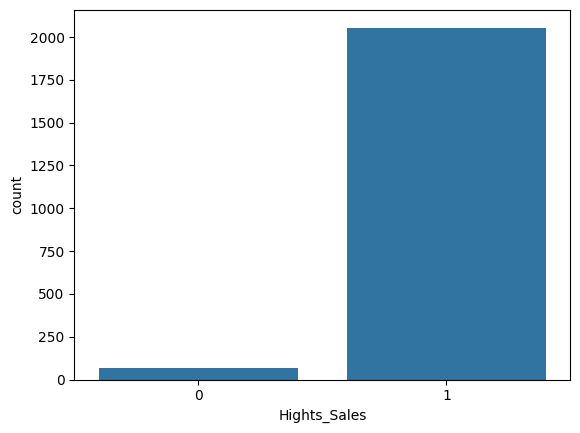

In [8]:
sns.countplot(x='Hights_Sales', data=df)
plt.show()

In [9]:
resambel = RandomOverSampler(random_state=42)
X_resampled, y_resampled = resambel.fit_resample(x, y)
print(y_resampled.value_counts())

Hights_Sales
1    2055
0    2055
Name: count, dtype: int64


In [10]:
balanced_df = pd.DataFrame(X_resampled, columns=x.columns)
balanced_df['Hights_Sales'] = y_resampled

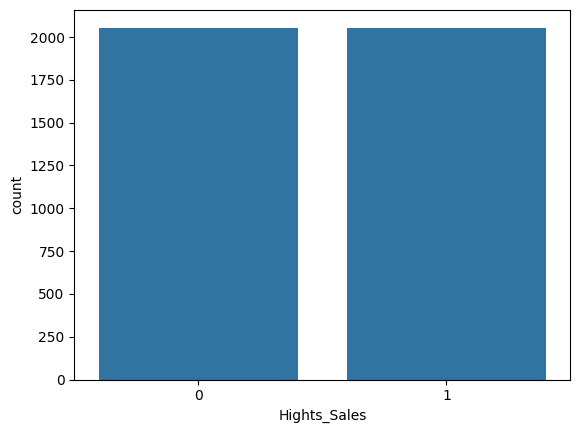

In [11]:
sns.countplot(x='Hights_Sales', data=balanced_df)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Trian the data on the logistic regression model**

In [13]:
#Standarized the numerical col
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [14]:
model = LogisticRegression()
normal_fitting = model.fit(x_trained_scaled,y_train)

**Get the prediction and Performance meuserment**

In [15]:
y_predict = model.predict(x_tested_scaled)

In [16]:
# Perfromance meuserment using the classification matrices
# 1.accuracy score
accuracy = accuracy_score(y_test,y_predict)

# 2.classification report
class_report = classification_report(y_test,y_predict)

# 3.confusion matrix
conf_matrix = confusion_matrix(y_test,y_predict)

In [17]:
print(f'Accuracy Score is \n',accuracy)

Accuracy Score is 
 0.8759124087591241


In [18]:
print(f'Classification Report is \n',class_report)

Classification Report is 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       385
           1       0.95      0.81      0.87       437

    accuracy                           0.88       822
   macro avg       0.88      0.88      0.88       822
weighted avg       0.89      0.88      0.88       822



In [19]:
print(f'Confusion Matrix is \n',conf_matrix)

Confusion Matrix is 
 [[366  19]
 [ 83 354]]


**Some visualizes for the performance meuserment**

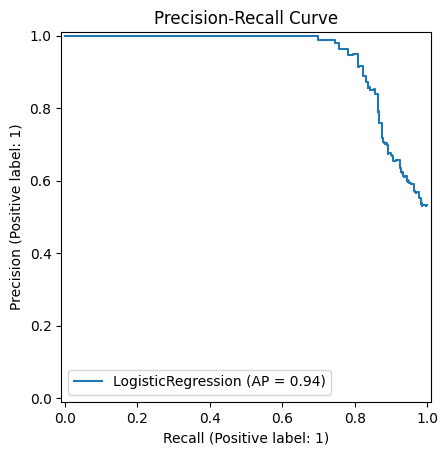

In [20]:
#Get the Precision Recall Curve
PrecisionRecallDisplay.from_estimator(model, x_tested_scaled, y_test)
plt.title('Precision-Recall Curve')
plt.show()

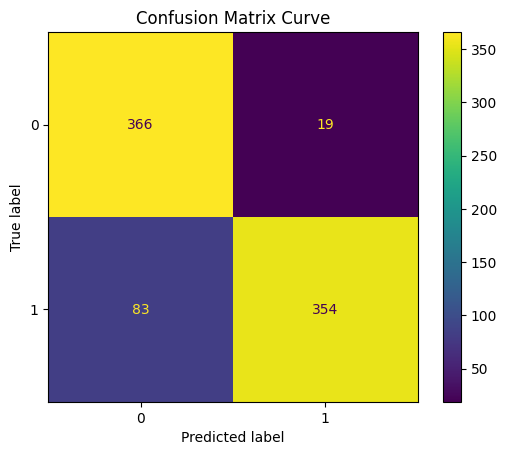

In [21]:
#Get Confusion Matri ploting
conf_curve = ConfusionMatrixDisplay(conf_matrix)
conf_curve.plot()
plt.title("Confusion Matrix Curve")
plt.show()

# **Start to make Some Feuter selection techniques to compare**

**Recursive Feature Elimination Selection**

In [22]:
RFE_LogModel = LogisticRegression()
rfe_selector = RFE(RFE_LogModel, n_features_to_select=5)
rfe_selector.fit(X_resampled, y_resampled)
selected_rfe_features = X_resampled.columns[rfe_selector.support_]
selected_rfe_features

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Index(['City', 'Sub-Category', 'Quantity', 'Discount', 'Profit'], dtype='object')

Main Five Features according to the RFE are(['City', 'Sub-Category', 'Quantity', 'Discount', 'Profit'])


**Forward Feature Selection**

In [23]:
fsf_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new_fsf = fsf_selector.fit_transform(X_resampled, y_resampled)
selected_fsf_features = x.columns[fsf_selector.get_support()]
selected_fsf_features

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 3  6  8 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['Region', 'Sub-Category', 'Quantity', 'Discount', 'Profit'], dtype='object')

Main Five Features according to the Fowrward are(['Region', 'Sub-Category', 'Quantity', 'Discount', 'Profit'])

# **Start To see some Assumtions to exaplin the result of the model**

**Linearty Assumption**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
<ipython-input-24-c42edad5657b>:5: RuntimeWarning: divide by zero encountered in divide
  logit = np.log(P / (1 - P))


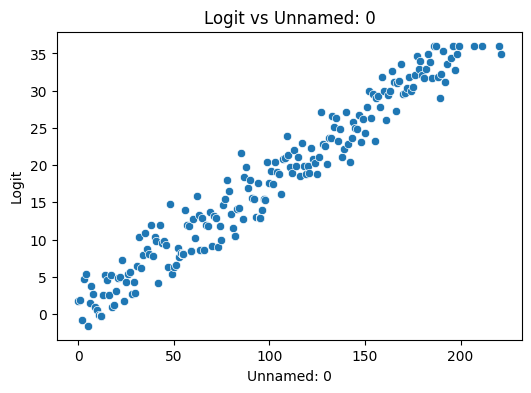

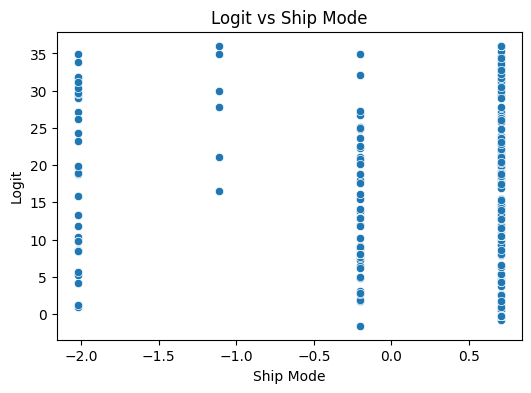

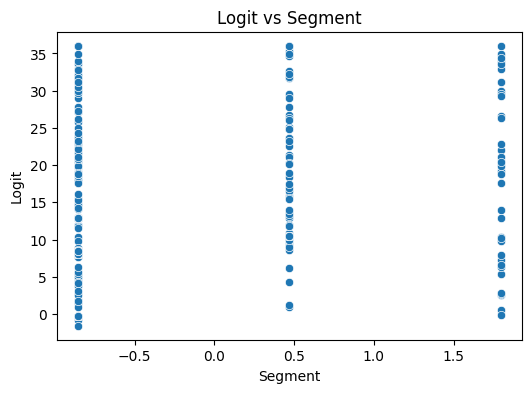

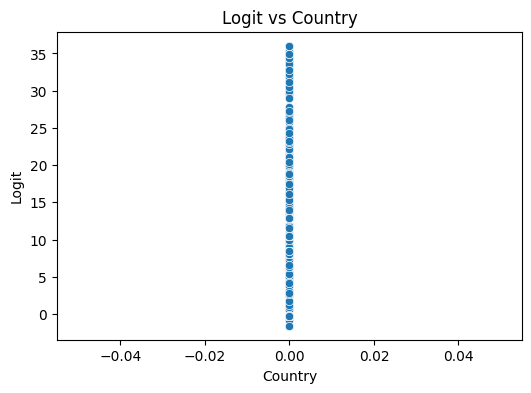

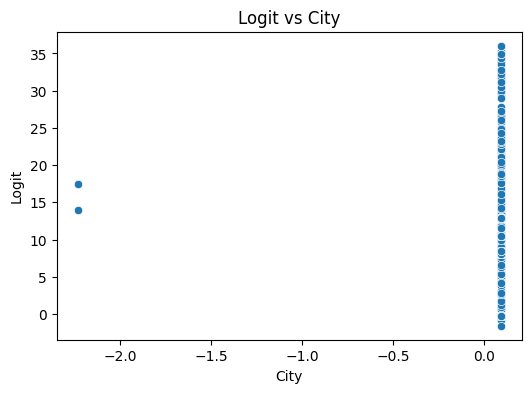

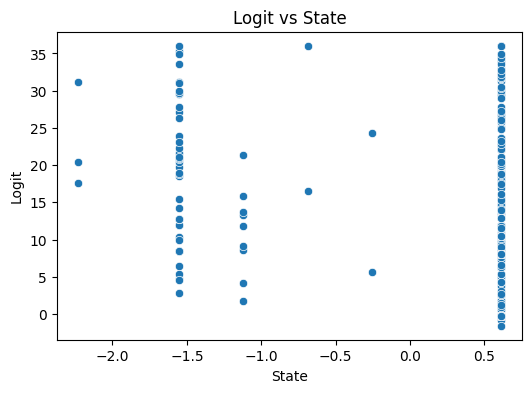

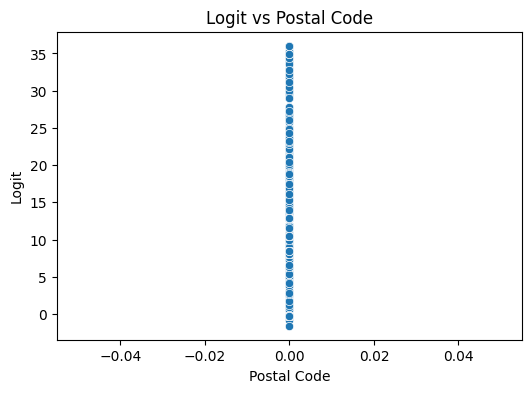

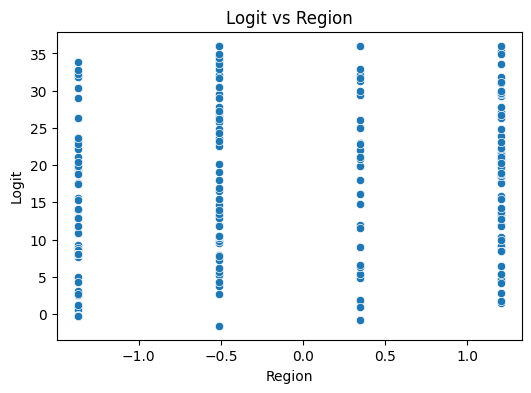

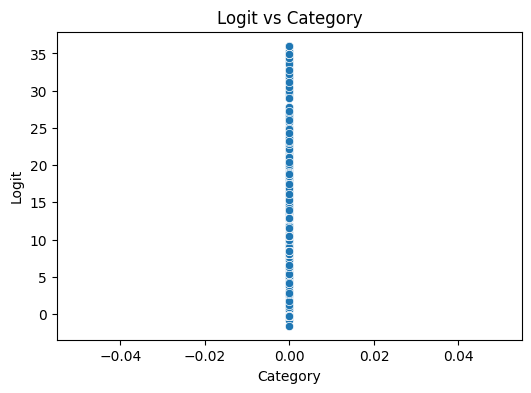

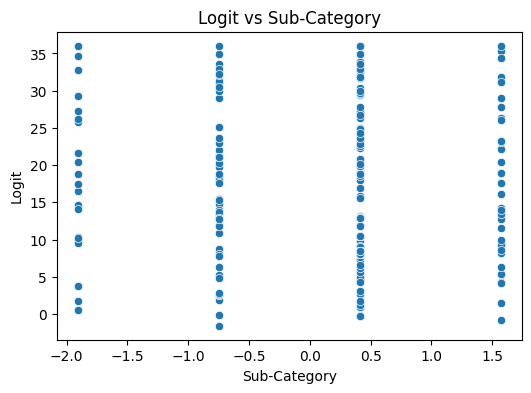

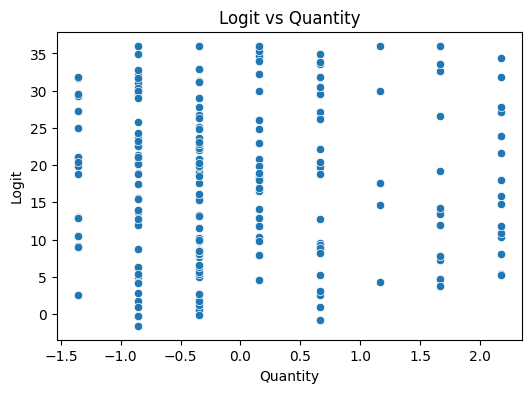

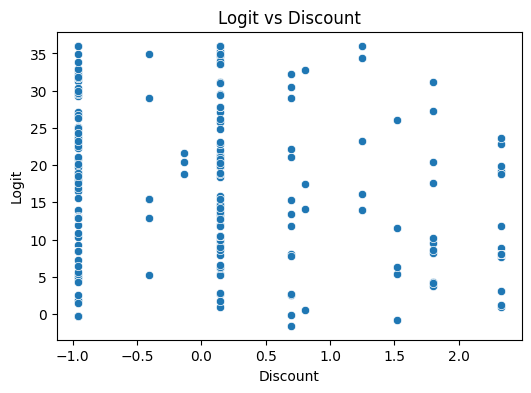

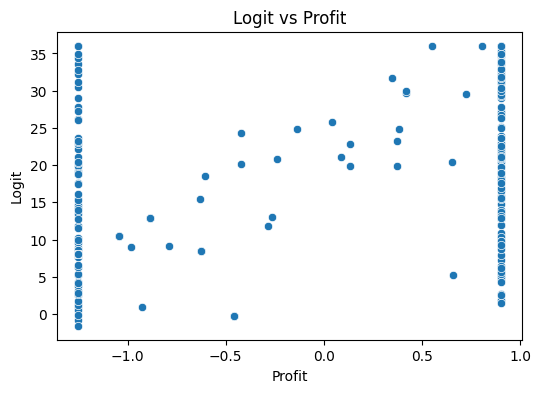

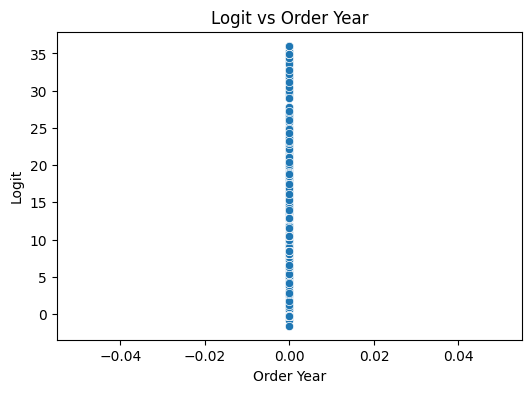

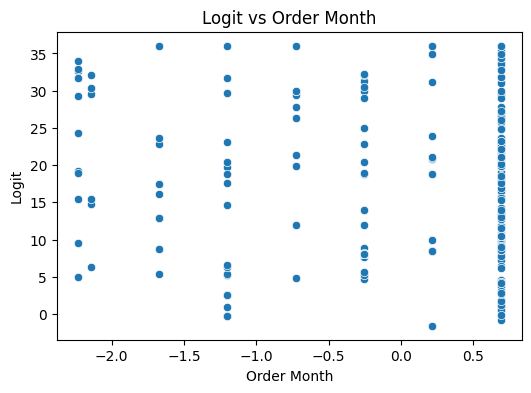

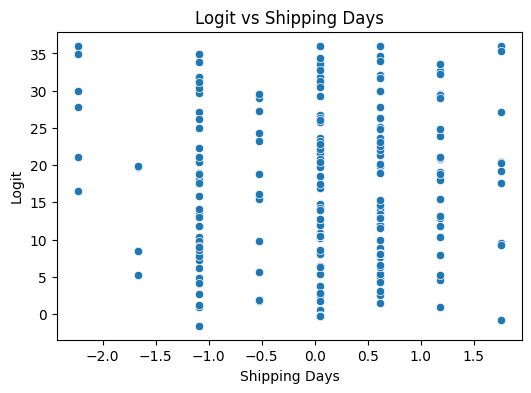

In [24]:
# Get predicted probabilities
P = model.predict_proba(X_resampled)[:, 1]  # probability of class 1

# Logit
logit = np.log(P / (1 - P))

#plot logit vs each feature
for col in X_resampled.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_resampled[col], y=logit)
    plt.title(f'Logit vs {col}')
    plt.xlabel(col)
    plt.ylabel('Logit')
    plt.show()

**No Multicollinearity**

In [25]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(balanced_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Unnamed: 0,2.666912
1,Ship Mode,2.094890
2,Segment,1.025833
3,Country,NaN
4,City,1.195193
5,State,2.009746
6,Postal Code,NaN
7,Region,2.715271
8,Category,NaN
9,Sub-Category,1.116821


non main cols are cols that print Nan

**Independence of observations**

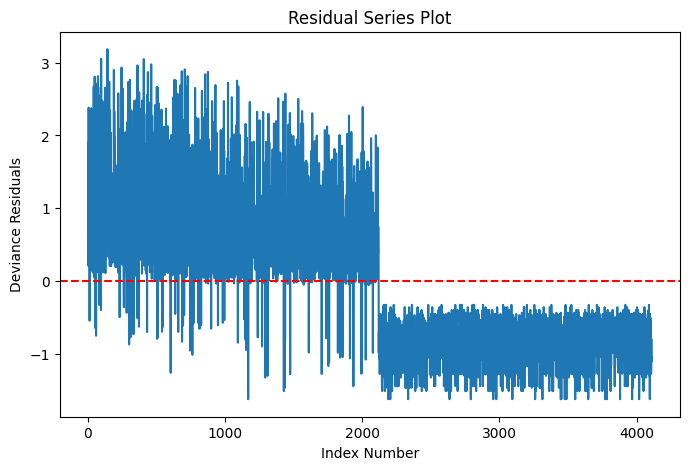

In [26]:
# Setup logistic regression model using GLM method so that we can retrieve residuals
logit_results = GLM(y_resampled, X_resampled, family=families.Binomial()).fit()

# Setup plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number",
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(balanced_df.index.tolist(),
        stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')


**Sufficiently large sample size**

In [27]:
print("Rows in the Dataframe :",len(balanced_df))
print("Categorize wise Distribution")
# Get value counts for independent variables
for col in balanced_df.columns.to_list()[1:]:
    if balanced_df.dtypes[col] == 'uint8':
        print(balanced_df[col].value_counts())

Rows in the Dataframe : 4110
Categorize wise Distribution


# **Interpretation after the Explainability Techniques**

**Drop cols acording to VIF**

In [28]:
drop_list = ['Country','Postal Code','Category','Order Year']
balanced_df.drop(columns=drop_list,inplace=True)
balanced_df.head()

,Unnamed: 0,Ship Mode,Segment,City,State,Region,Sub-Category,Quantity,Discount,Profit,Order Month,Shipping Days,Hights_Sales
0,0,-0.203147,-0.855104,0.090866,0.609512,0.345650,-1.905541,-0.852755,-0.957784,0.901562,0.690145,-0.522427,1
1,1,-0.203147,-0.855104,0.090866,0.609512,0.345650,-0.747025,-0.348194,-0.957784,0.901562,0.690145,-0.522427,1
2,2,0.705444,-0.855104,0.090866,0.609512,0.345650,1.570008,0.660927,1.521192,-1.252827,0.690145,1.756472,1
3,3,0.705444,-0.855104,0.090866,-1.553471,1.202701,0.411492,1.670048,-0.957784,0.901562,-0.254709,0.617023,1
4,4,0.705444,-0.855104,0.090866,-1.553471,1.202701,1.570008,2.174609,0.143983,0.901562,-0.254709,0.617023,1


**Drop cols according to Linearty Assumption**

In [27]:
# drop_cols = ['Discount','Profit']
# balanced_df.drop(columns=drop_cols,inplace=True)
# balanced_df.head()

**-Resplit the data and retrain the model**

In [29]:
x_pretrain = balanced_df.drop(['Hights_Sales'], axis=1)
y_pretrain = balanced_df['Hights_Sales']

In [30]:
X_retrain, X_retest, y_retrain, y_retest = train_test_split(x_pretrain, y_pretrain, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
x_retrained_scaled = scaler.fit_transform(X_retrain)
x_retested_scaled = scaler.transform(X_retest)

In [32]:
retrained_model = LogisticRegression()
fitting = retrained_model.fit(x_retrained_scaled,y_retrain)

**Get the prediction and Performance meuserment**

In [33]:
y_predict_two = retrained_model.predict(x_retested_scaled)

In [34]:
# Perfromance meuserment using the classification matrices
# 1.accuracy score
accuracy_two = accuracy_score(y_retest,y_predict_two)

# 2.classification report
class_report_two = classification_report(y_retest,y_predict_two)

# 3.confusion matrix
conf_matrix_two = confusion_matrix(y_retest,y_predict_two)

In [35]:
print(f'Accuracy Score is \n',accuracy_two)

Accuracy Score is 
 0.8759124087591241


In [36]:
print(f'Classification Report is \n',class_report_two)

Classification Report is 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       385
           1       0.95      0.81      0.87       437

    accuracy                           0.88       822
   macro avg       0.88      0.88      0.88       822
weighted avg       0.89      0.88      0.88       822



In [37]:
print(f'Confusion Matrix is \n',conf_matrix_two)

Confusion Matrix is 
 [[366  19]
 [ 83 354]]


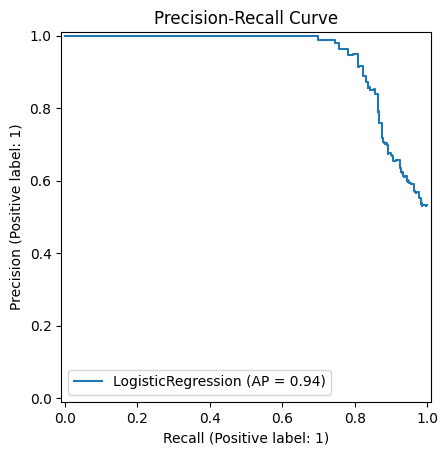

In [38]:
#Get the Precision Recall Curve
PrecisionRecallDisplay.from_estimator(retrained_model, x_retested_scaled, y_retest)
plt.title('Precision-Recall Curve')
plt.show()

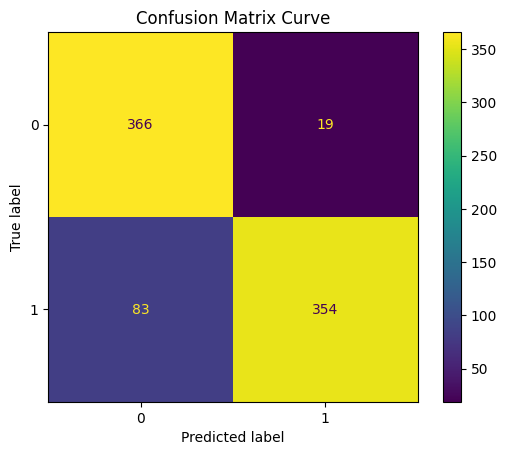

In [39]:
#Get Confusion Matri ploting
conf_curve = ConfusionMatrixDisplay(conf_matrix_two)
conf_curve.plot()
plt.title("Confusion Matrix Curve")
plt.show()

**Use Local Agnostic Models(SHAP)**

In [40]:
!pip install shap

In [41]:
import shap

In [42]:
explainer = shap.Explainer(retrained_model, x_pretrain)
shap_values = explainer(x_pretrain)

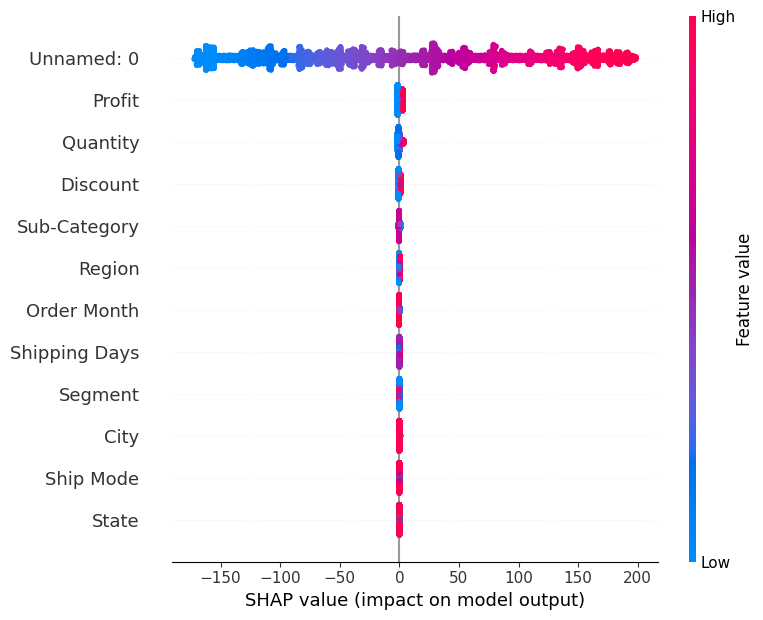

In [43]:
shap.summary_plot(shap_values, x_pretrain)

**Use Global Agnostic Models**

**ALE**

In [45]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 103.5 MB/s eta 0:00:0

In [49]:
from alibi.explainers import ALE

In [50]:
feature_names = x_pretrain.columns.tolist()

In [51]:
ale_explainer = ALE(
    predictor=retrained_model.predict_proba,
    feature_names=feature_names,
    target_names=['Low Sales', 'High Sales']  # Class 0 and 1
)

In [52]:
ale_result = ale_explainer.explain(x_retested_scaled)

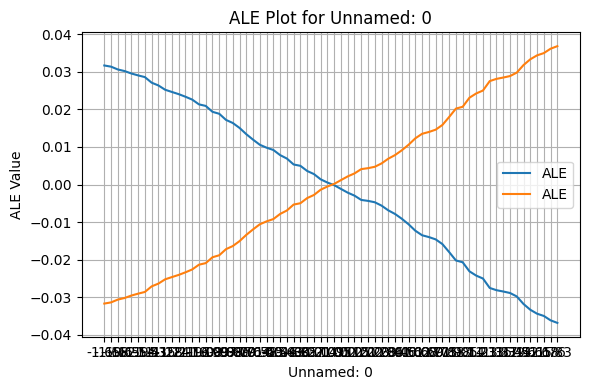

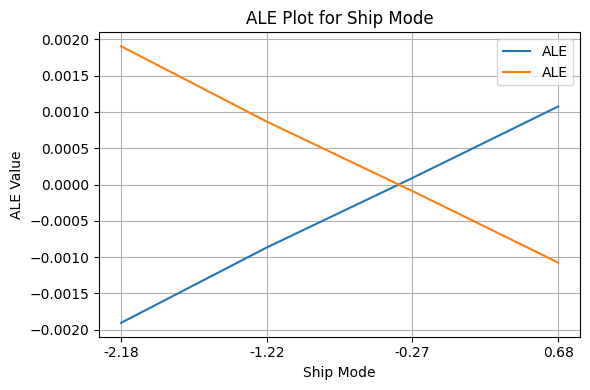

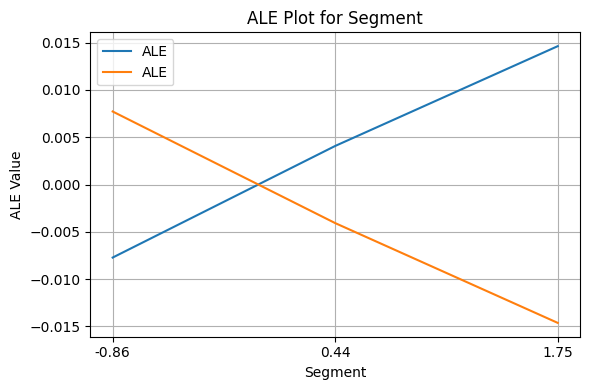

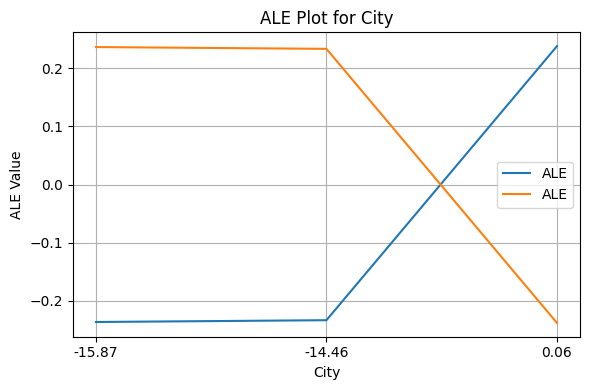

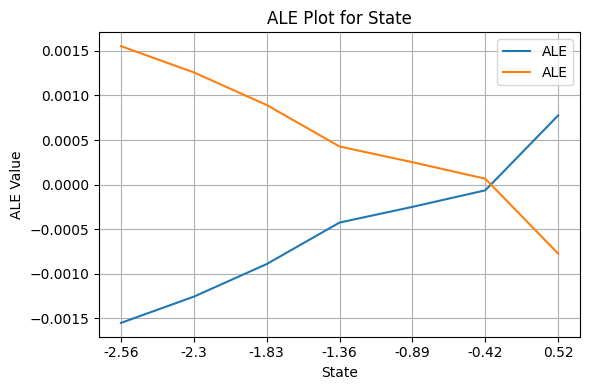

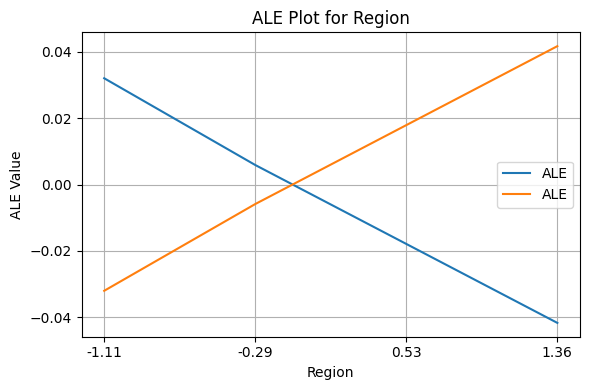

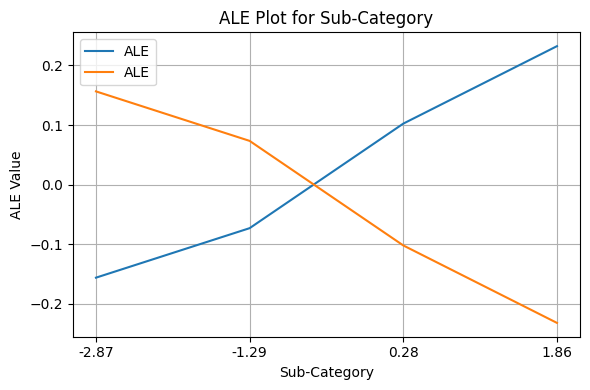

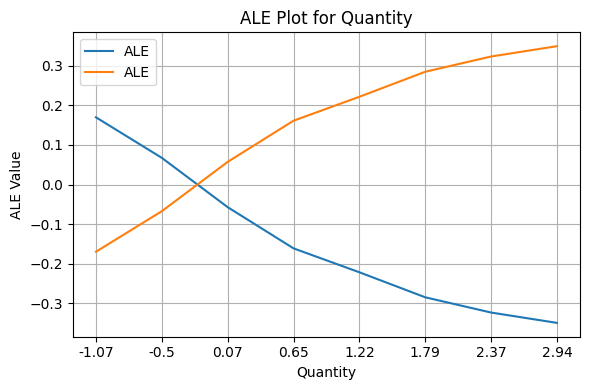

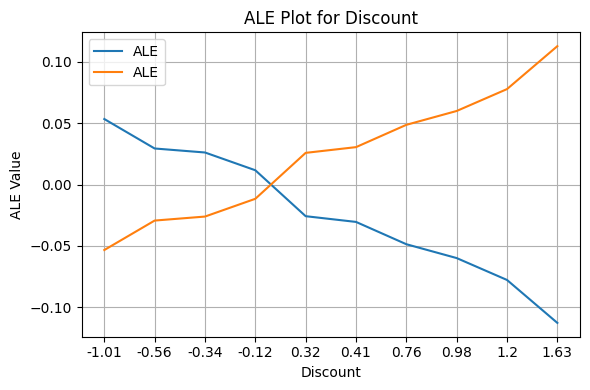

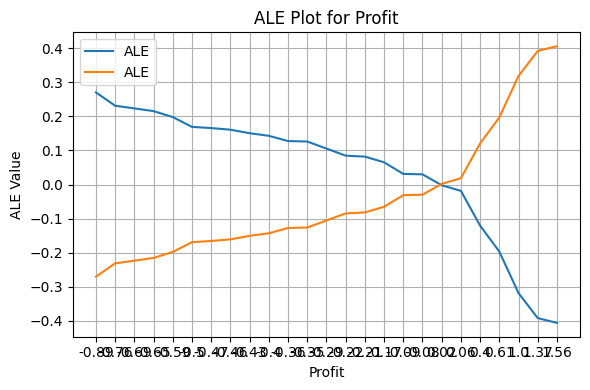

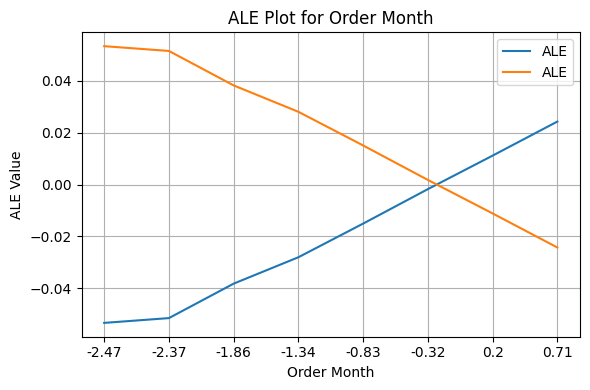

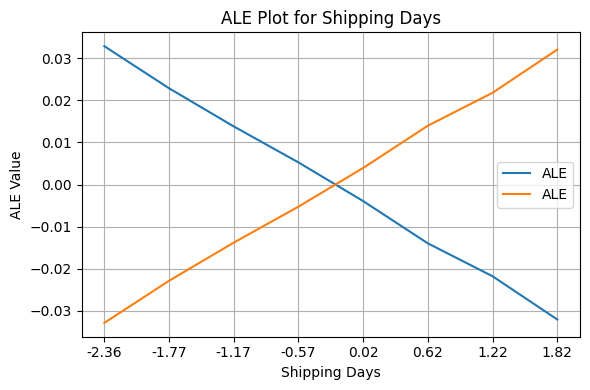

In [56]:
# Loop through all features and plot their ALE values
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 4))
    plt.plot(ale_result.ale_values[i], label='ALE')
    plt.xticks(ticks=range(len(ale_result.feature_values[i])),
               labels=[round(val, 2) for val in ale_result.feature_values[i]])
    plt.xlabel(f'{feature}')
    plt.ylabel('ALE Value')
    plt.title(f'ALE Plot for {feature}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


**Permutation Feauter Importance**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has fe

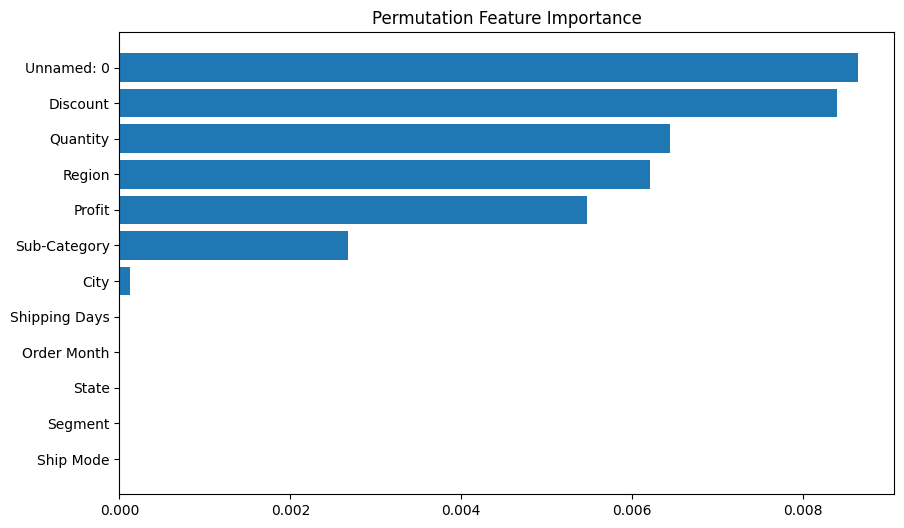

In [69]:
result = permutation_importance(retrained_model, X_retest, y_retest, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(x_pretrain.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

**Leave-One-Feature-Out Importance**

In [66]:
# Create DataFrame with feature names for retrained model
X_retrain_df = pd.DataFrame(X_retrain, columns=x_pretrain.columns)
y_retrain_df = pd.Series(y_retrain)
# Initialize a new logistic regression model
lofo_model = LogisticRegression(max_iter=1000)

In [67]:
# Calculate baseline score using all features
baseline = cross_val_score(lofo_model, X_retrain_df, y_retrain_df, cv=5).mean()
print(f"Baseline Cross-Validated Accuracy: {baseline:.4f}")

# Calculate LOFO scores
lofo_scores = {}
for col in X_retrain_df.columns:
    X_lofo = X_retrain_df.drop(columns=[col])
    score = cross_val_score(lofo_model, X_lofo, y_retrain_df, cv=5).mean()
    lofo_scores[col] = baseline - score
# Convert to Series and sort
lofo_df = pd.Series(lofo_scores).sort_values(ascending=True)


Baseline Cross-Validated Accuracy: 0.8592


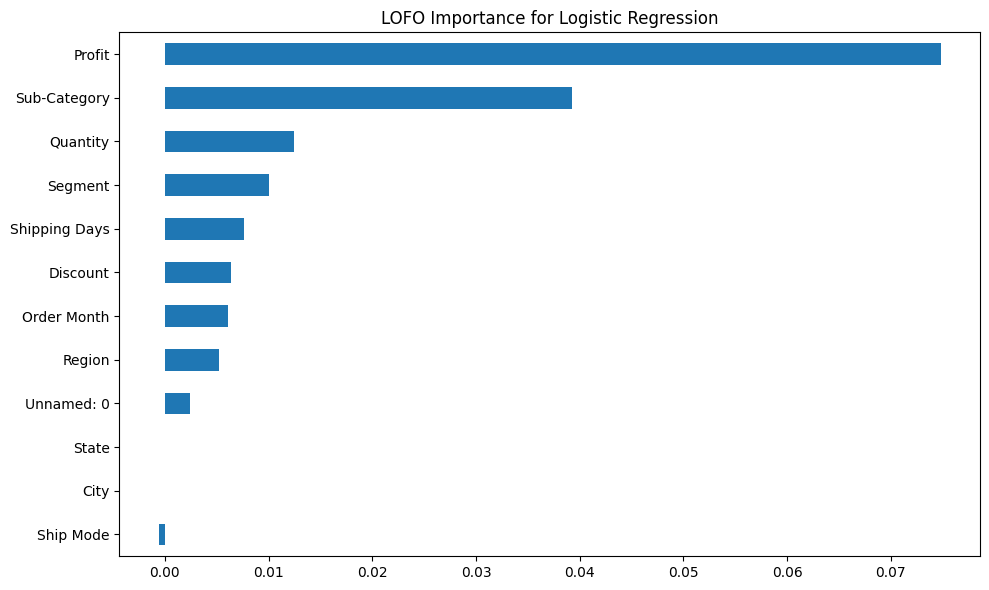

In [72]:
# Plot
plt.figure(figsize=(10, 6))
lofo_df.plot(kind='barh')
plt.title("LOFO Importance for Logistic Regression")
plt.tight_layout()
plt.show()